In [11]:
import pandas as pd
import numpy as np
gas_data = pd.read_csv("datathon data/gas_prices/regular_formulated_gas_prices_rf_linear.csv", index_col=0)
gas_data = gas_data.rename(columns={"Price": "Gas_Price"})
gas_data = gas_data[["Gas_Price", "Brent_Price", "Date"]]
stock_data = pd.read_csv("datathon data/all_stocks_and_etfs.csv")
gas_data["Date"] = pd.to_datetime(gas_data["Date"])
stock_data["Date"] = pd.to_datetime(stock_data["Date-Time"])
label_col = 'Close'
lag = 1
stock_data[f'Close_lag_{lag}'] = stock_data['Close'].shift(lag)
stock_data = stock_data[["Date", "Ticker_Symbol", label_col]]
df = pd.merge(
    left=stock_data,
    right=gas_data,
    on="Date",
    how="inner"
)
df = df.dropna()
df

,Date,Ticker_Symbol,Close,Gas_Price,Brent_Price
0,2023-12-18,HAL,36.2100,3.053,76.206
1,2023-12-11,HAL,34.7700,3.136,75.500
2,2023-12-04,HAL,37.3700,3.231,80.648
3,2023-11-27,HAL,37.6900,3.238,80.868
4,2023-11-20,HAL,38.2000,3.289,81.760
...,...,...,...,...,...
26821,2000-02-07,SPY,142.3750,1.325,27.504
26822,2000-01-31,SPY,139.5625,1.316,27.000
26823,2000-01-24,SPY,140.3437,1.315,26.588
26824,2000-01-10,SPY,146.2500,1.264,23.468


In [12]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error

# Assume `df` is your full DataFrame with a 'Ticker_Symbol' column
feature_cols = ["Gas_Price", "Brent_Price", "Ticker_Symbol"]
label_col = 'Close'

# Prepare a dict to hold per‐ticker results
results = {}

for symbol in df['Ticker_Symbol'].unique():
    # print(f"Processing {symbol}...")
    
    # 1) Subset the DataFrame to this ticker
    print(symbol)
    sub = df[df['Ticker_Symbol'] == symbol].copy()
    # 2) Extract X and y
    X = sub[feature_cols]
    y = sub[label_col]
    X.drop(columns=['Ticker_Symbol'], inplace=True)

    # 3) Standardize
    scaler = StandardScaler()
    X_scaled = pd.DataFrame(
        scaler.fit_transform(X),
        index=X.index,
        columns=X.columns
    )
    y_scaled = pd.Series(
        scaler.fit_transform(y.values.reshape(-1, 1)).ravel(),
        index=y.index,
        name=y.name
    )

    # print(X)
    # print(y)
    
    # 4) Train/test split
    X_train, X_test, y_train, y_test = train_test_split(
        X_scaled, y_scaled, test_size=0.2, random_state=42
    )
    
    # 5) Fit model
    model = XGBRegressor(random_state=42)
    model.fit(X_train, y_train)
    
    # 6) Predict & evaluate
    y_pred_test = model.predict(X_test)
    y_pred_train = model.predict(X_train)
    mse_test = mean_squared_error(y_test, y_pred_test)
    mse_train = mean_squared_error(y_train, y_pred_train)
    
    # 7) Feature importances
    feat_imp = pd.DataFrame({
        'feature': X.columns,
        'importance': model.feature_importances_
    }).sort_values('importance', ascending=False)
    
    # 8) Store results
    results[symbol] = {
        'model': model,
        'mse_train': mse_train,
        'mse_test': mse_test,
        'feature_importances': feat_imp
    }

print(f"Processing {symbol}...")

# Accessing results for e.g. ticker "HAL":
print("HAL train MSE:", results['HAL']['mse_train'])
print("HAL test MSE:",  results['HAL']['mse_test'])
print("HAL top features:\n", results['HAL']['feature_importances'].head())

HAL


/tmp/ipykernel_10443/1311735693.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.drop(columns=['Ticker_Symbol'], inplace=True)


FANG
E
EXC


/tmp/ipykernel_10443/1311735693.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.drop(columns=['Ticker_Symbol'], inplace=True)
/tmp/ipykernel_10443/1311735693.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.drop(columns=['Ticker_Symbol'], inplace=True)
/tmp/ipykernel_10443/1311735693.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.drop(columns=['Ticker_Symbol'], inplace=True)


HES


/tmp/ipykernel_10443/1311735693.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.drop(columns=['Ticker_Symbol'], inplace=True)


BKR
BPT


/tmp/ipykernel_10443/1311735693.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.drop(columns=['Ticker_Symbol'], inplace=True)
/tmp/ipykernel_10443/1311735693.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.drop(columns=['Ticker_Symbol'], inplace=True)


VLO
CVX


/tmp/ipykernel_10443/1311735693.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.drop(columns=['Ticker_Symbol'], inplace=True)
/tmp/ipykernel_10443/1311735693.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.drop(columns=['Ticker_Symbol'], inplace=True)


OXY


/tmp/ipykernel_10443/1311735693.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.drop(columns=['Ticker_Symbol'], inplace=True)


KMI


/tmp/ipykernel_10443/1311735693.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.drop(columns=['Ticker_Symbol'], inplace=True)


PSX
NOV


/tmp/ipykernel_10443/1311735693.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.drop(columns=['Ticker_Symbol'], inplace=True)
/tmp/ipykernel_10443/1311735693.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.drop(columns=['Ticker_Symbol'], inplace=True)


CHK
MPC
DVN


/tmp/ipykernel_10443/1311735693.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.drop(columns=['Ticker_Symbol'], inplace=True)
/tmp/ipykernel_10443/1311735693.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.drop(columns=['Ticker_Symbol'], inplace=True)
/tmp/ipykernel_10443/1311735693.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.drop(columns=['Ticker_Symbol'], inplace=True)


COP
EPD
BP


/tmp/ipykernel_10443/1311735693.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.drop(columns=['Ticker_Symbol'], inplace=True)
/tmp/ipykernel_10443/1311735693.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.drop(columns=['Ticker_Symbol'], inplace=True)
/tmp/ipykernel_10443/1311735693.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.drop(columns=['Ticker_Symbol'], inplace=True)


XOM


/tmp/ipykernel_10443/1311735693.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.drop(columns=['Ticker_Symbol'], inplace=True)


EOG


/tmp/ipykernel_10443/1311735693.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.drop(columns=['Ticker_Symbol'], inplace=True)


CEO


/tmp/ipykernel_10443/1311735693.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.drop(columns=['Ticker_Symbol'], inplace=True)


SLB
WMB


/tmp/ipykernel_10443/1311735693.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.drop(columns=['Ticker_Symbol'], inplace=True)
/tmp/ipykernel_10443/1311735693.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.drop(columns=['Ticker_Symbol'], inplace=True)


ONEQ
DIA


/tmp/ipykernel_10443/1311735693.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.drop(columns=['Ticker_Symbol'], inplace=True)
/tmp/ipykernel_10443/1311735693.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.drop(columns=['Ticker_Symbol'], inplace=True)


VOO
SPY
Processing SPY...
HAL train MSE: 0.0845930009111855
HAL test MSE: 0.8860337058795198
HAL top features:
        feature  importance
1  Brent_Price    0.617566
0    Gas_Price    0.382434


/tmp/ipykernel_10443/1311735693.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.drop(columns=['Ticker_Symbol'], inplace=True)
/tmp/ipykernel_10443/1311735693.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.drop(columns=['Ticker_Symbol'], inplace=True)


HAL train MSE: 0.0845930009111855
HAL test MSE: 0.8860337058795198


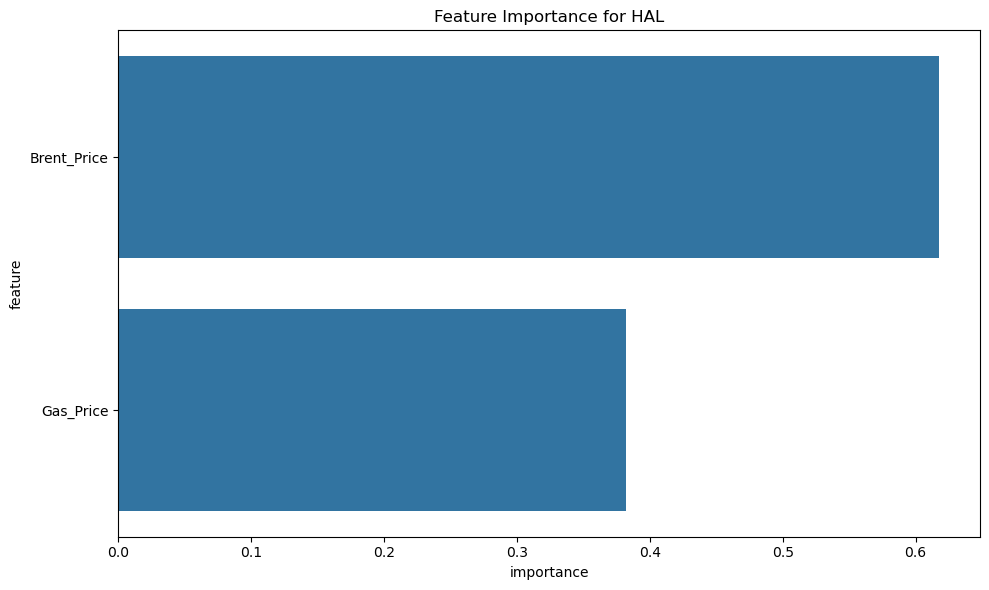

FANG train MSE: 0.009154326746441064
FANG test MSE: 0.41562339678868787


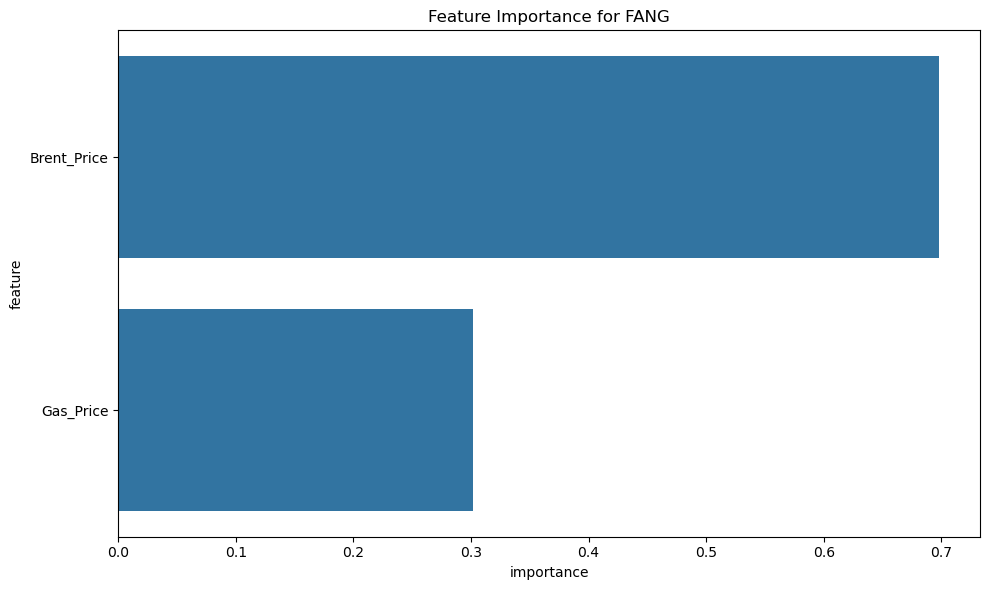

E train MSE: 0.03091626948578374
E test MSE: 1.0437771104584908


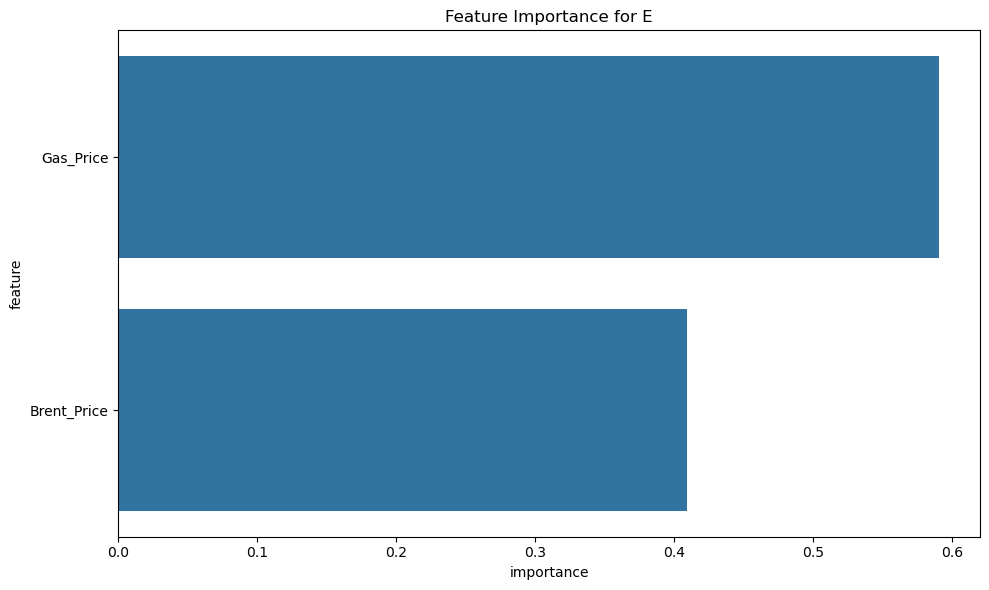

EXC train MSE: 0.06370358813901938
EXC test MSE: 0.661892732953212


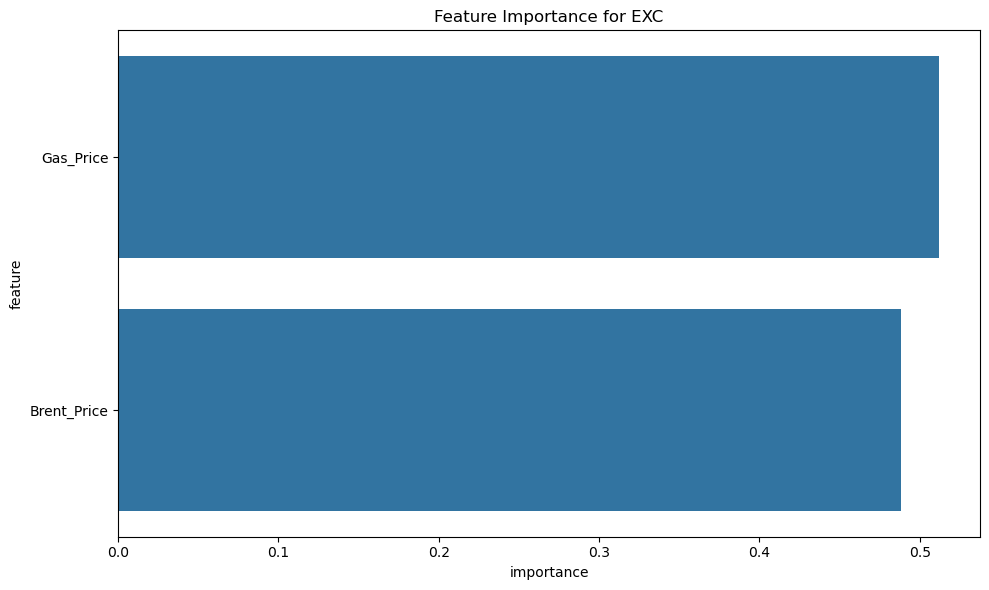

HES train MSE: 0.04903570787087148
HES test MSE: 0.7388100071041852


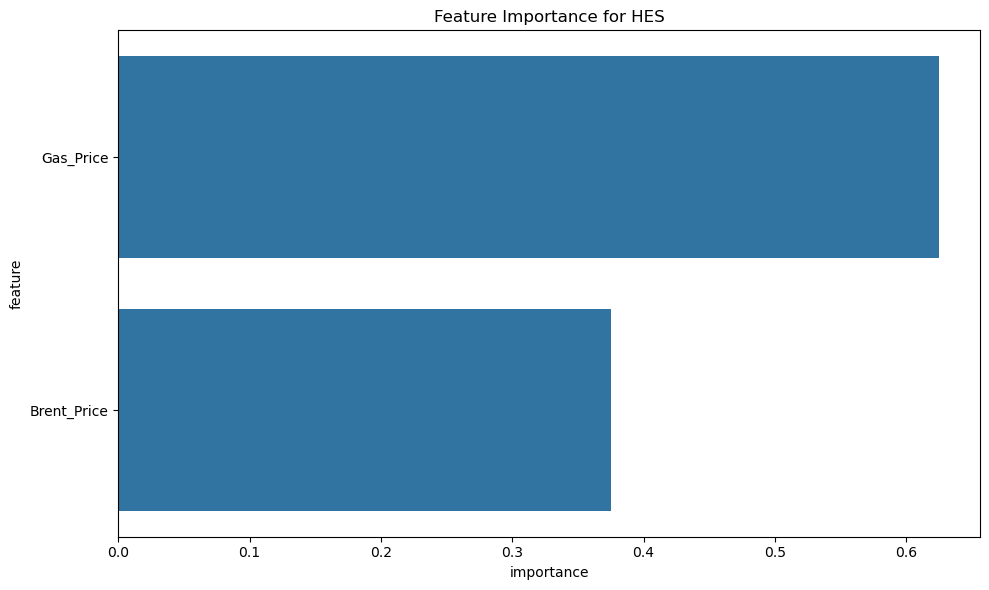

BKR train MSE: 0.0005218659931232069
BKR test MSE: 0.5596367297688497


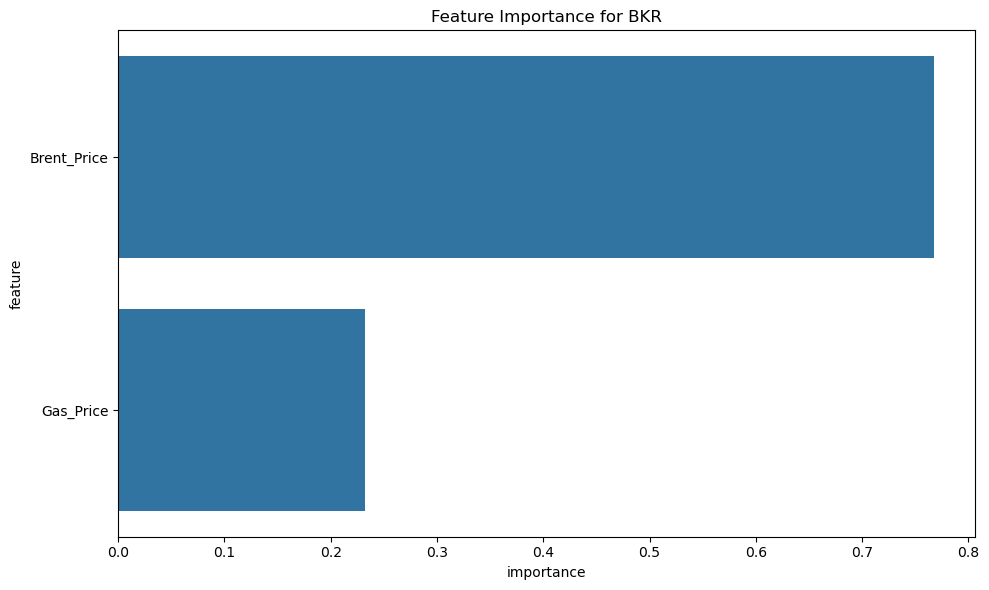

BPT train MSE: 0.017764054946078255
BPT test MSE: 0.3671496370405398


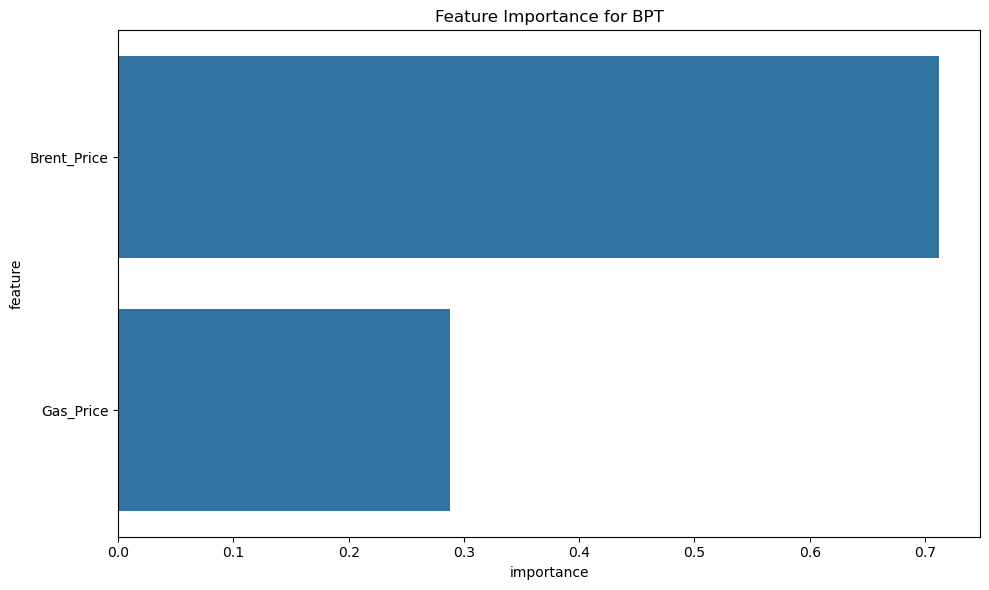

VLO train MSE: 0.031115010181328943
VLO test MSE: 0.5628068807645514


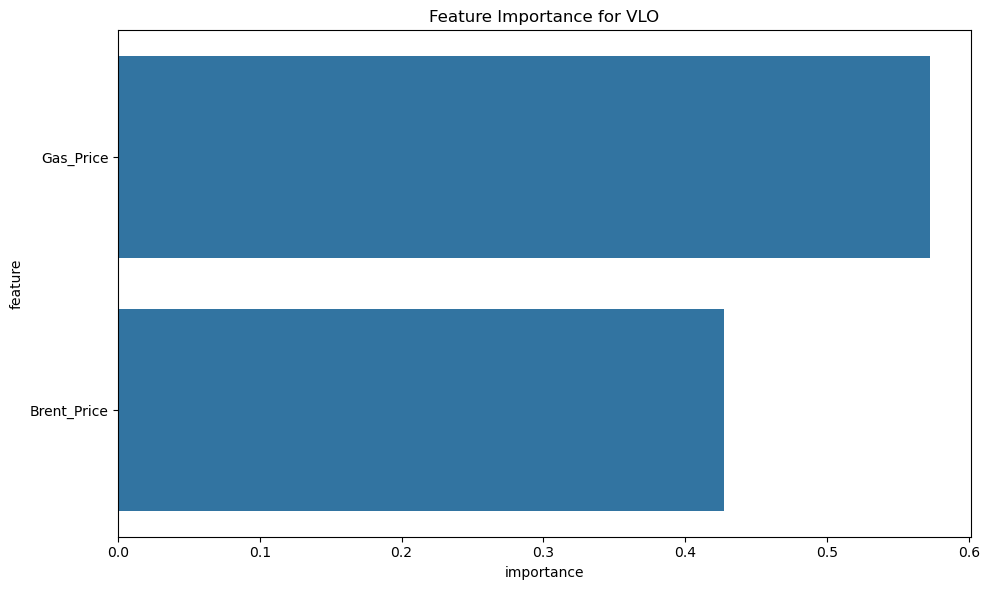

CVX train MSE: 0.02480904793311623
CVX test MSE: 0.5451069312482362


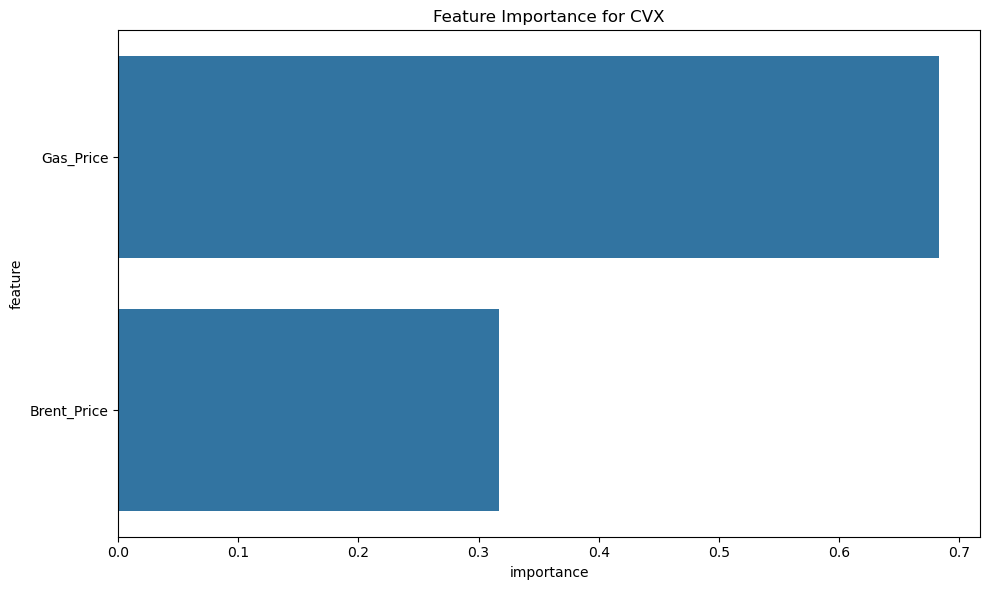

OXY train MSE: 0.03226847128435783
OXY test MSE: 0.44941405746602403


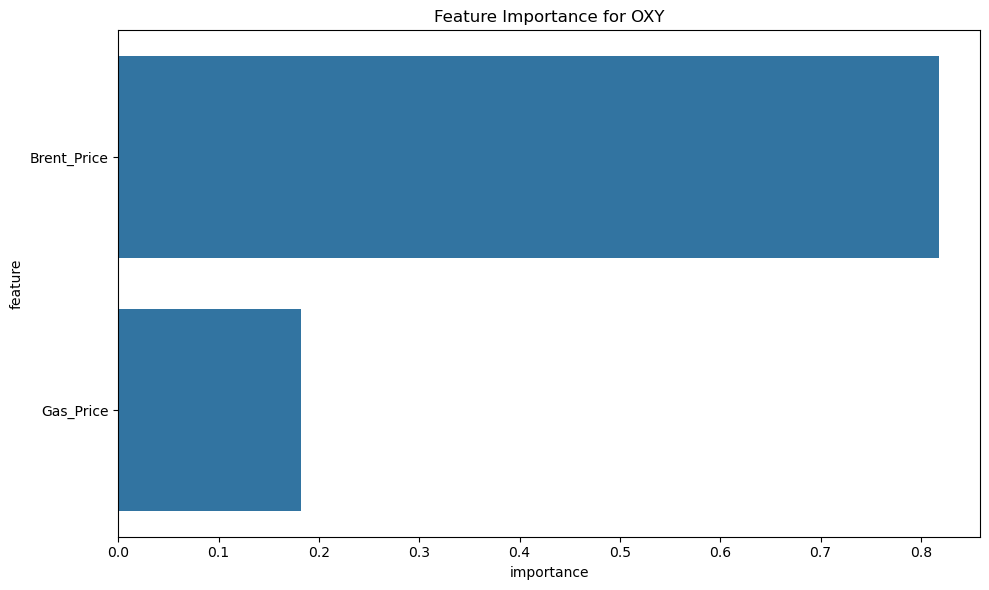

KMI train MSE: 0.005940394285444563
KMI test MSE: 0.4148154901454362


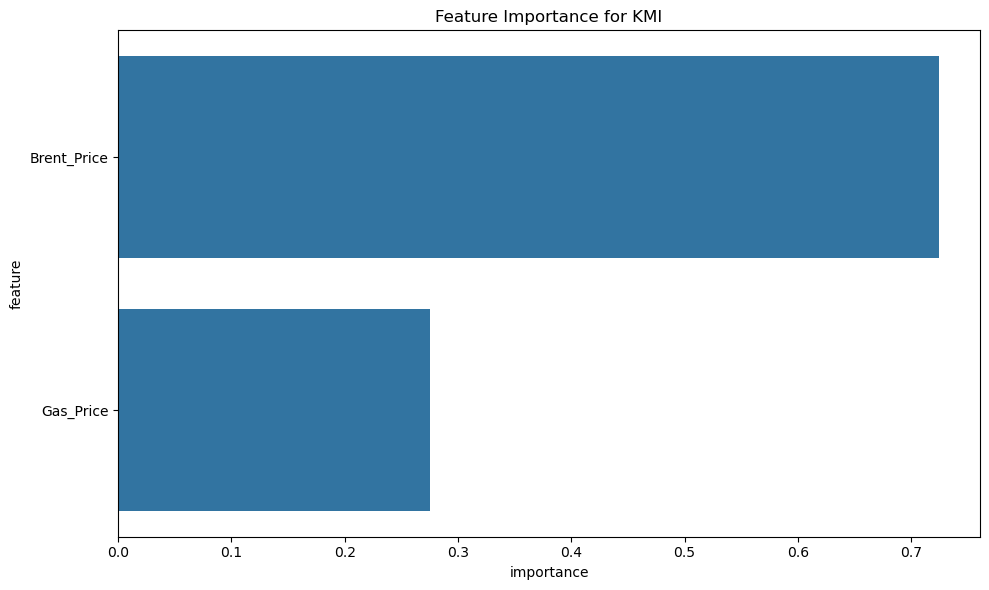

PSX train MSE: 0.0055821284314788566
PSX test MSE: 0.5744565583103687


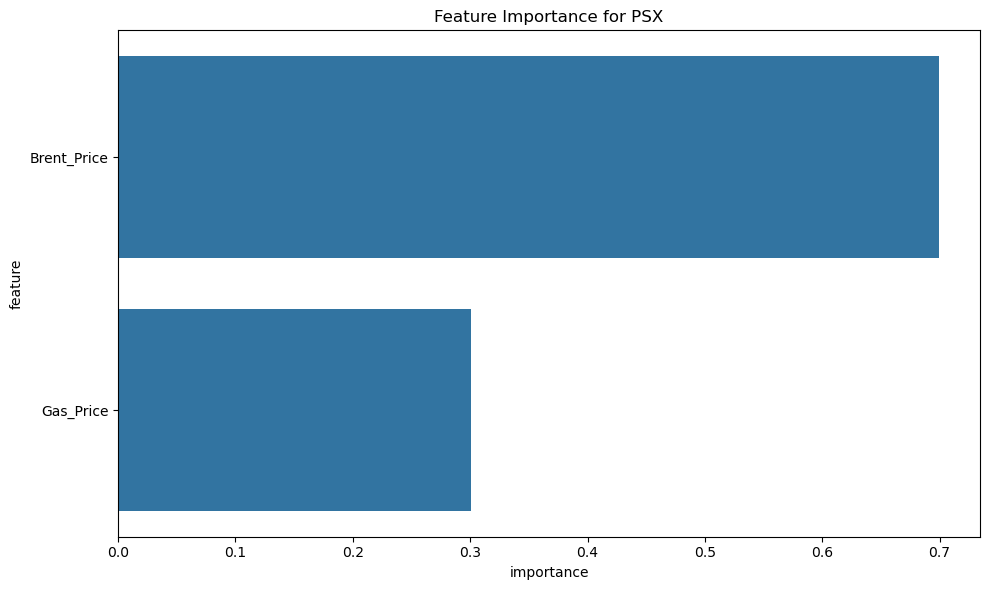

NOV train MSE: 0.01847284186416671
NOV test MSE: 0.5026447921178564


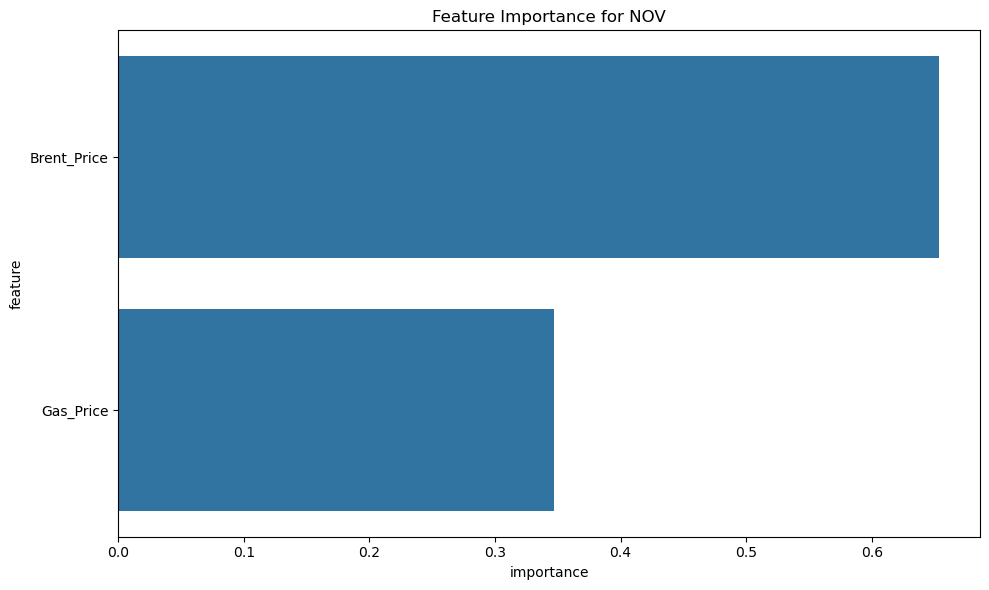

CHK train MSE: 3.040276805304813e-06
CHK test MSE: 0.34747787494857724


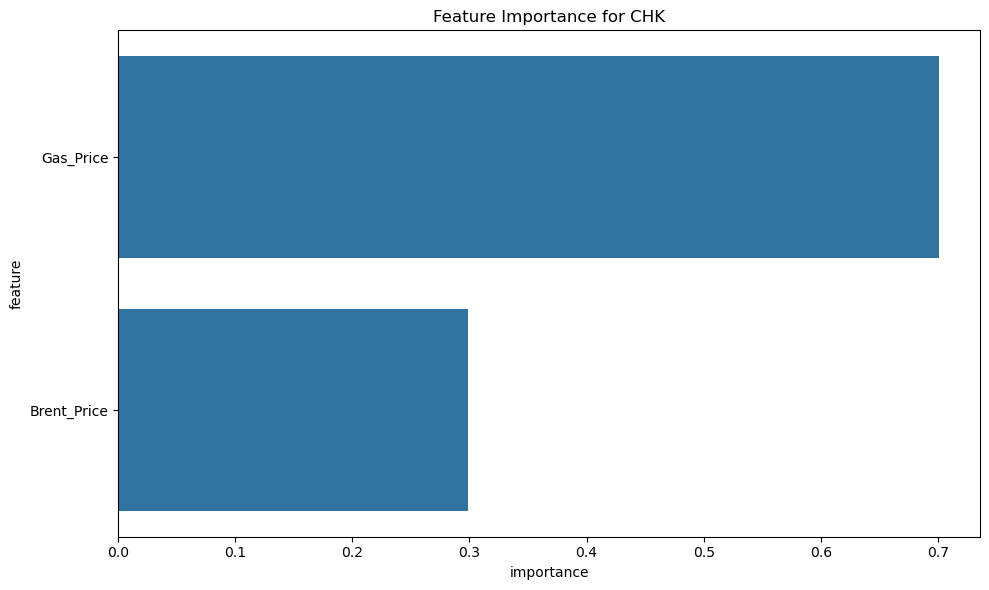

MPC train MSE: 0.004647829572239802
MPC test MSE: 0.5877056018397454


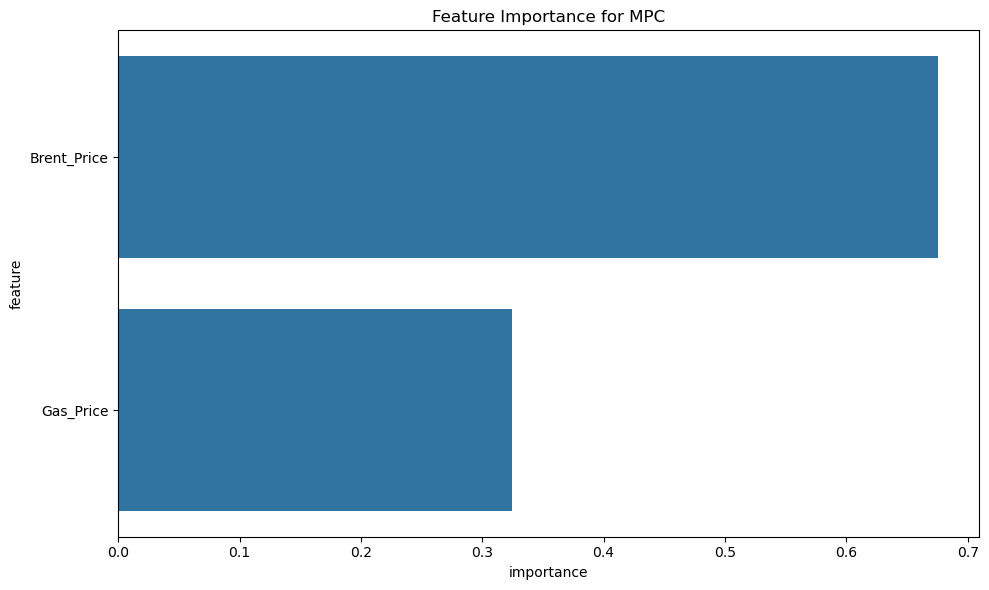

DVN train MSE: 0.047920034063577116
DVN test MSE: 0.5574810190168236


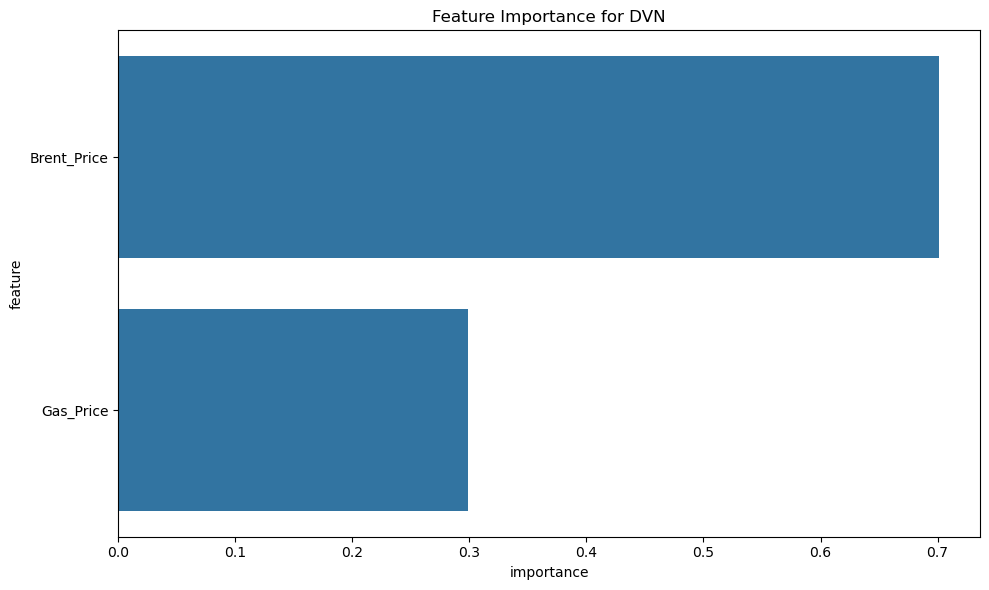

COP train MSE: 0.022803504150095372
COP test MSE: 0.679899723455572


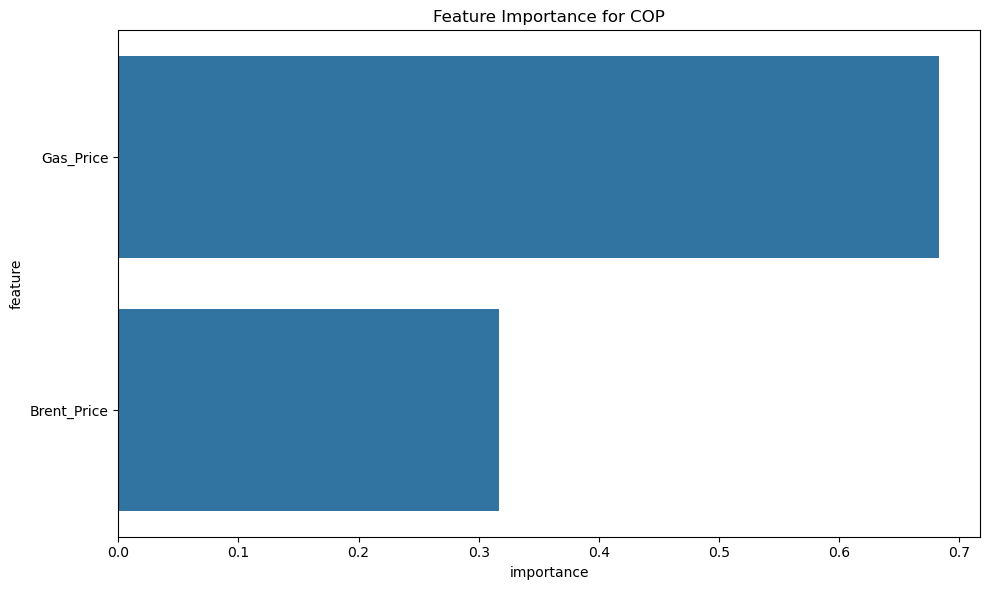

EPD train MSE: 0.021734843951115083
EPD test MSE: 0.3553616582566124


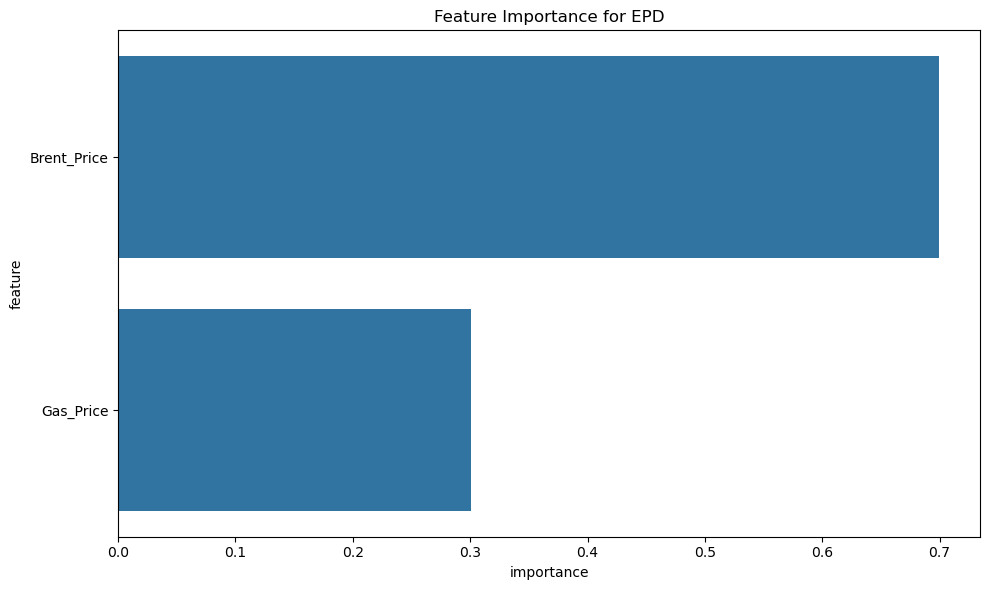

BP train MSE: 0.05923285651764404
BP test MSE: 0.7178602151983914


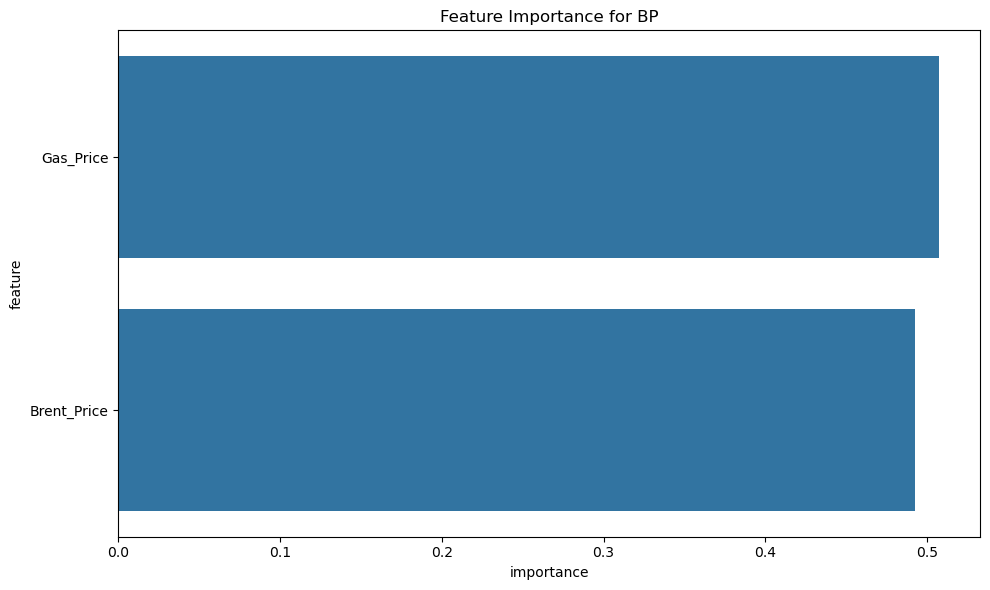

XOM train MSE: 0.040459128175453524
XOM test MSE: 0.5602854112133848


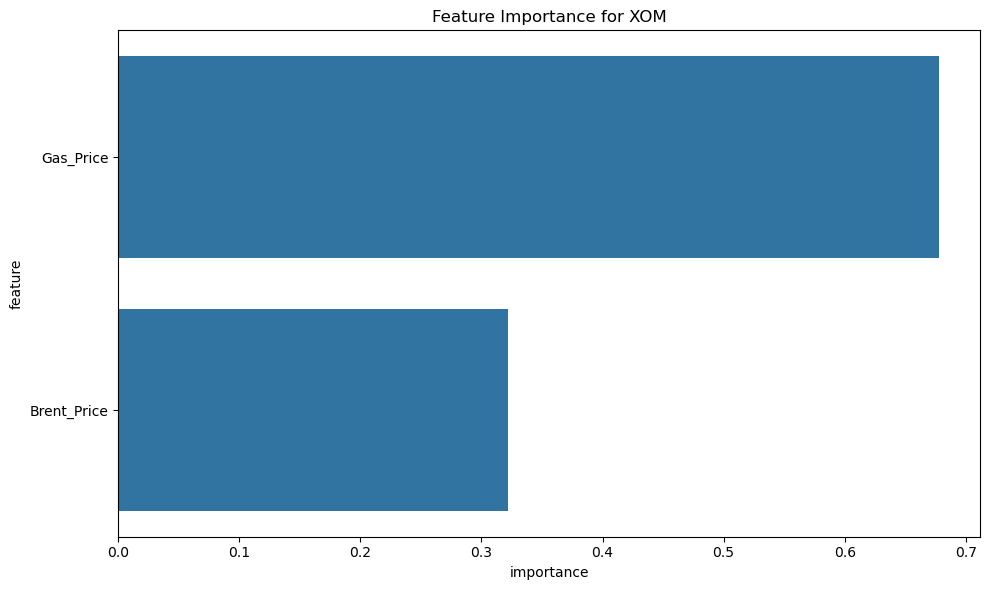

EOG train MSE: 0.019970372596848456
EOG test MSE: 0.2698188265231289


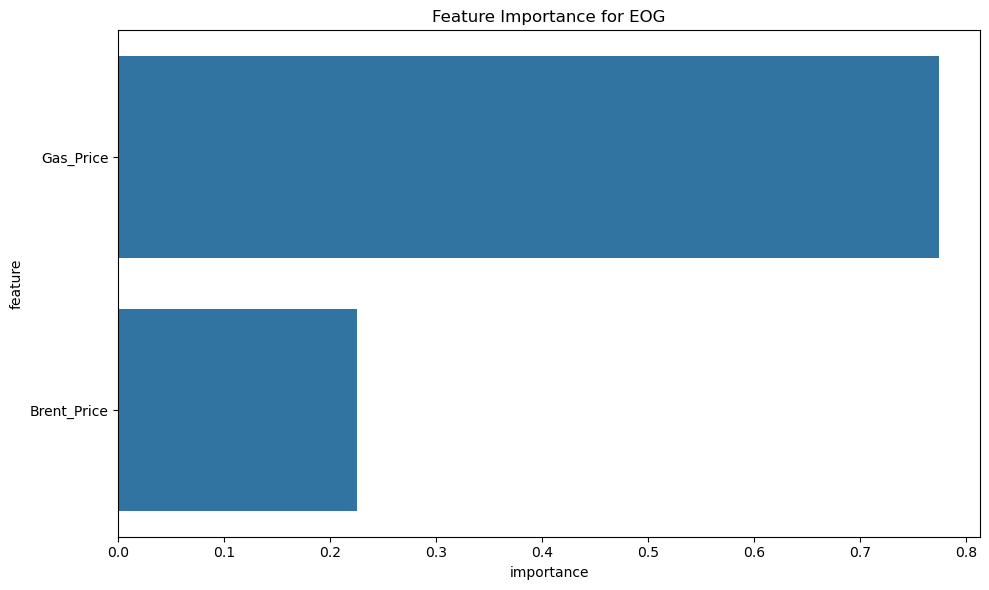

CEO train MSE: 0.00929848753865205
CEO test MSE: 0.2536616874063415


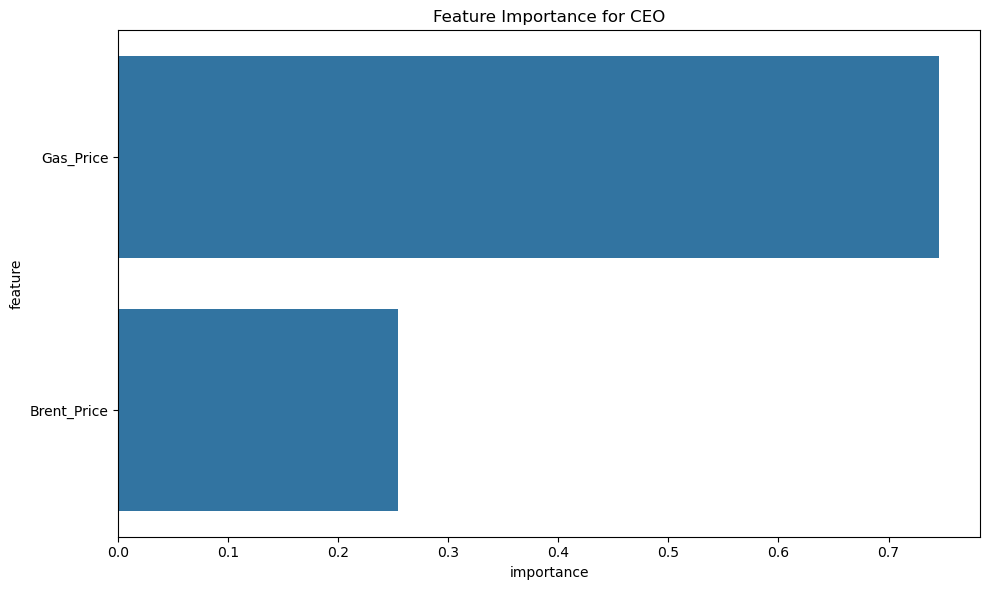

SLB train MSE: 0.06334949229263283
SLB test MSE: 0.786099032900484


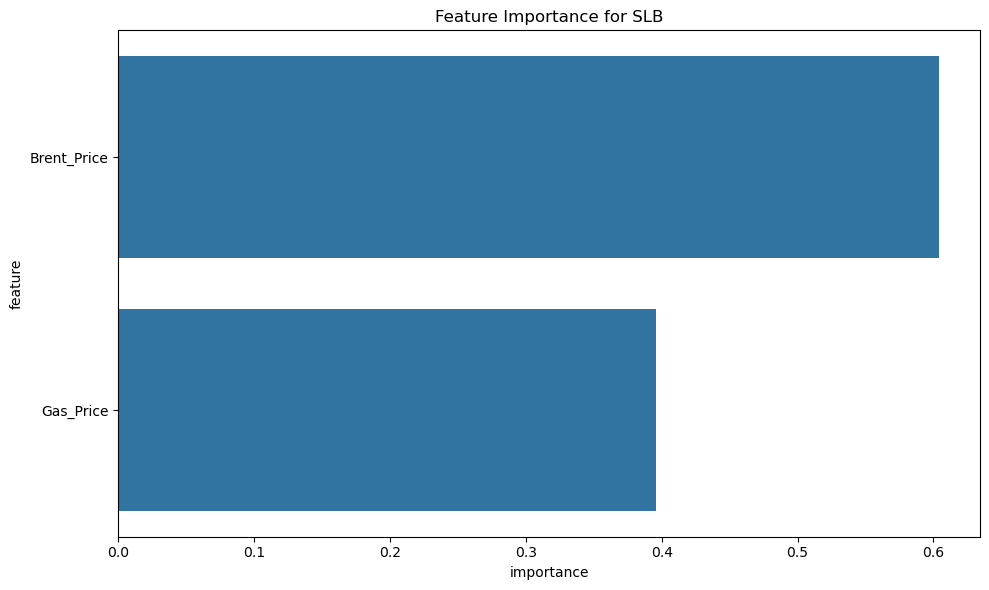

WMB train MSE: 0.041205381063944425
WMB test MSE: 0.8119471823431856


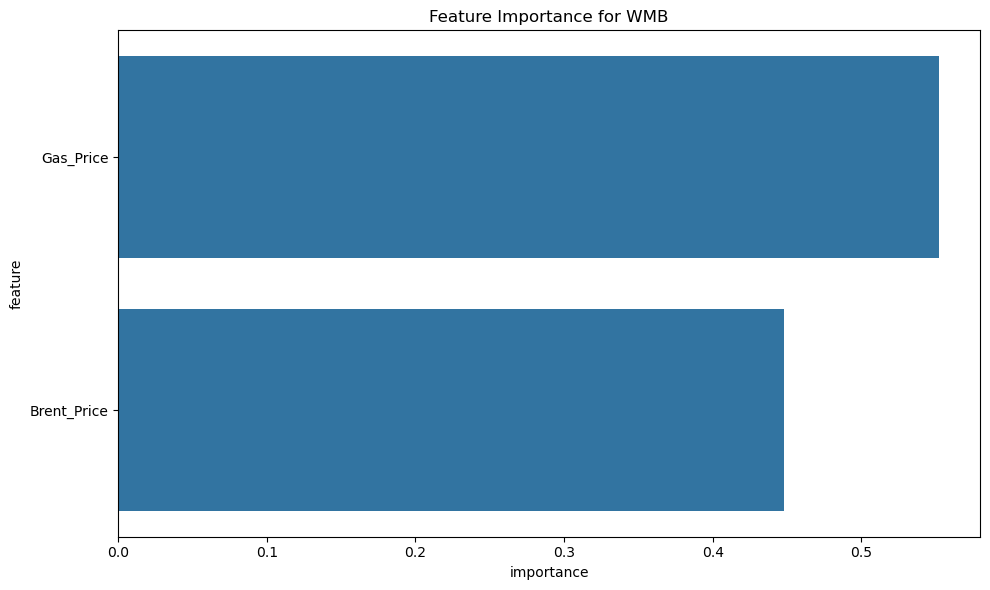

ONEQ train MSE: 0.0155540396462471
ONEQ test MSE: 0.5367779398708942


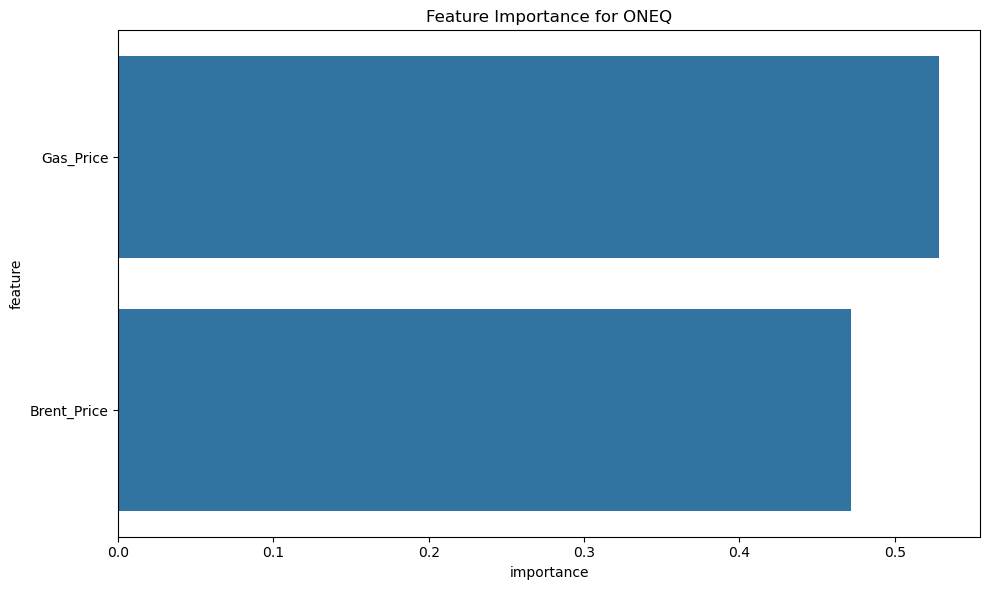

DIA train MSE: 0.018877562657638035
DIA test MSE: 0.5177739747874884


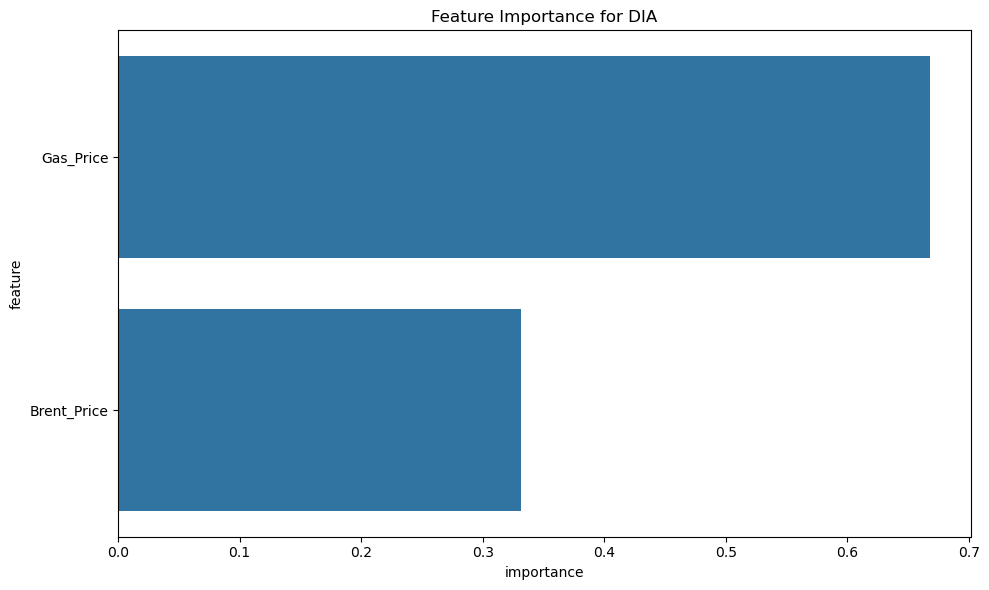

VOO train MSE: 0.0026020759768837316
VOO test MSE: 0.3933669164888355


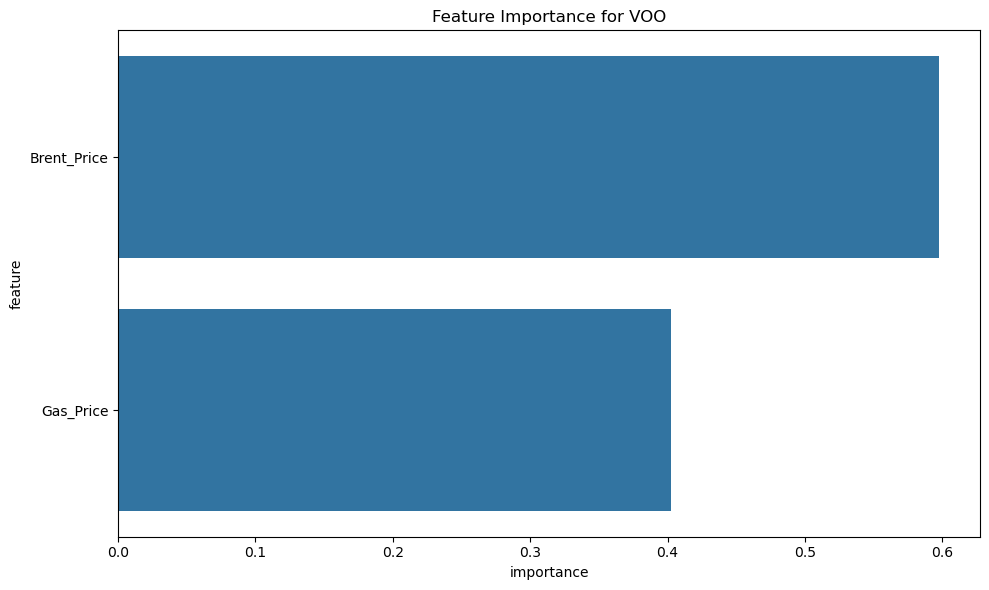

SPY train MSE: 0.020901454646431533
SPY test MSE: 0.5534704762043835


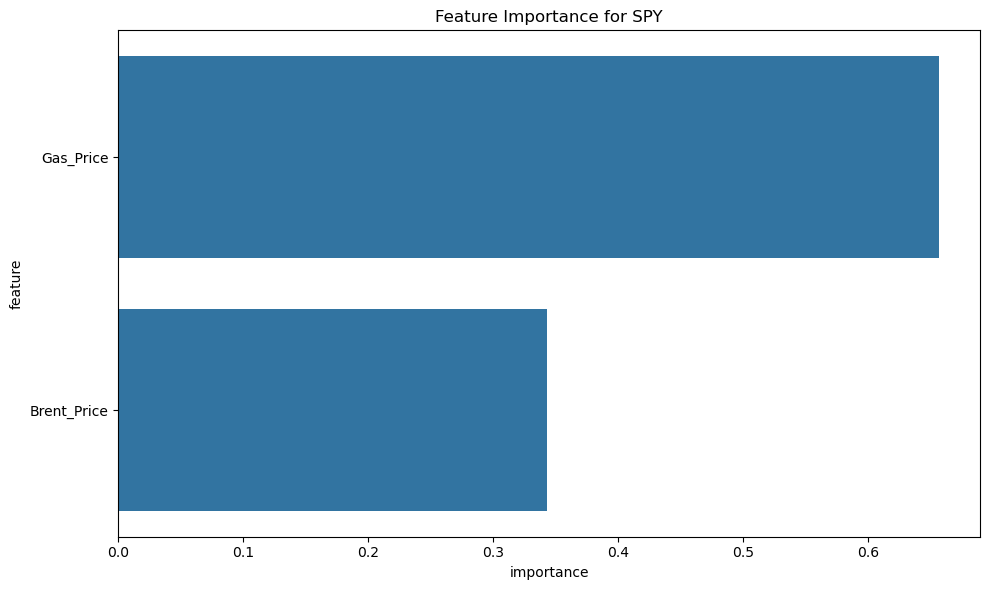

In [13]:
from matplotlib import pyplot as plt
import seaborn as sns
for symbol in df['Ticker_Symbol'].unique():
    print(f"{symbol} train MSE:", results[symbol]['mse_train'])
    print(f"{symbol} test MSE:",  results[symbol]['mse_test'])
    
    feat_importance = results[symbol]['feature_importances']
    feat_importance['feature'] = feat_importance['feature'].str.replace('_logreturn', '')
    feat_importance['feature'] = feat_importance['feature'].str.replace('Close_lag_1', 'Close')
    feat_importance['feature'] = feat_importance['feature'].str.replace('Stock_Number', 'Stock Number')
    feat_importance['feature'] = feat_importance['feature'].str.replace('logreturn', 'Log Return')

    # Plotting
    plt.figure(figsize=(10, 6))
    sns.barplot(x='importance', y='feature', data=feat_importance)
    plt.title(f"Feature Importance for {symbol}")
    plt.tight_layout()
    plt.show()